# <font color=red> Prosper Loan Data Exploration </font>

## Investigation Overview

>**In this investigation**, I wanted to look at the  factors that affect a loan’s outcome status and what affects the borrower’s interest rate?

## Dataset Overview

> **Prosper** is America’s first peer-to-peer lending marketplace, with more than 2 million members and over $2,000,000,000 in funded loans. Here we use the data available to the public (last updated on March 11th, 2014) from Prosper, which contains all the listings and loans ever created with 81 variables on each loan/listing, to do some data analysis.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [4]:
columns=['ListingKey','ListingCreationDate','Term','Occupation','EmploymentStatus','LoanStatus','BorrowerState','BorrowerAPR','IncomeRange','Investors','ProsperScore','BorrowerRate']
new_df=df[columns]
new_df.head()

,ListingKey,ListingCreationDate,Term,Occupation,EmploymentStatus,LoanStatus,BorrowerState,BorrowerAPR,IncomeRange,Investors,ProsperScore,BorrowerRate
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Other,Self-employed,Completed,CO,0.16516,"$25,000-49,999",258,NaN,0.1580
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Professional,Employed,Current,CO,0.12016,"$50,000-74,999",1,7.0,0.0920
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Other,Not available,Completed,GA,0.28269,Not displayed,41,NaN,0.2750
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Skilled Labor,Employed,Current,GA,0.12528,"$25,000-49,999",158,9.0,0.0974
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Executive,Employed,Current,MN,0.24614,"$100,000+",20,4.0,0.2085


### <font color=blue> What is the most income range? </font> 
> The income range of the borrower at the time the listing was created.



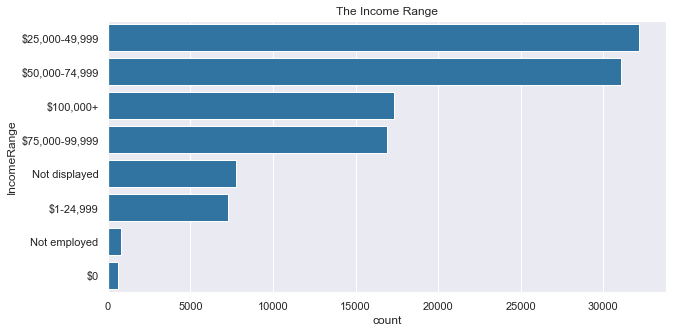

In [5]:
# plotting a bar chart
plt.figure(figsize = [10, 5])
order = new_df.IncomeRange.value_counts().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,y='IncomeRange',color=color,order=order)
plt.title('The Income Range');

> **We can see that the highest income range for borrowers is 25,000-49,999.**

*  **I think that the unemployed people or with 0$ income can take a loan guarantee of things other than income.**

### <font color=blue> What is the top borrowers states ? </font> 

>The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.


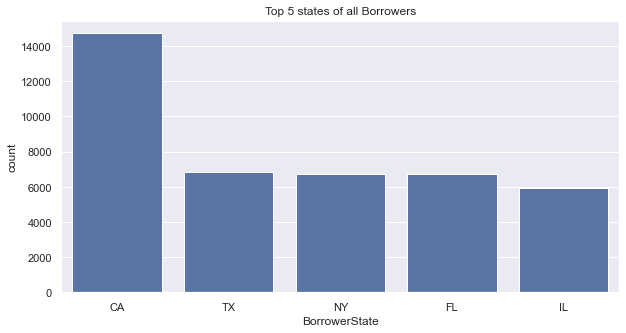

In [6]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
order=new_df['BorrowerState'].value_counts().head().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,x='BorrowerState',order=order,color=color)
plt.title("Top 5 states of all Borrowers");

> **California  has the heighest number of borrowers. More than 140000 person.**


### <font color=blue>  What is the borrower current emoplyment status?</font>

> The employment status of the borrower at the time they posted the listing.


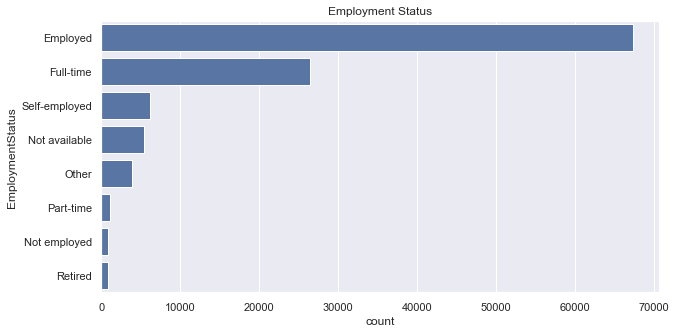

In [7]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
order=new_df['EmploymentStatus'].value_counts().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,y='EmploymentStatus',order=order,color=color);
plt.title('Employment Status');

> **We can see that the most frequent employment status is Employed, Full-time, Self-employed.**


### <font color=blue>  Relationship between Term and IncomeRange.</font>


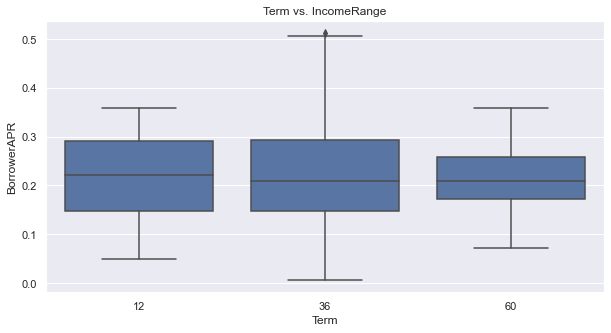

In [8]:
#plotting boxplot
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=new_df ,y='BorrowerAPR', x='Term',color=base_color)
plt.title('Term vs. IncomeRange');

> **We can see that 36 month is the largrest range.**


### <font color=blue> BorrowerRate pattern over the years.</font>

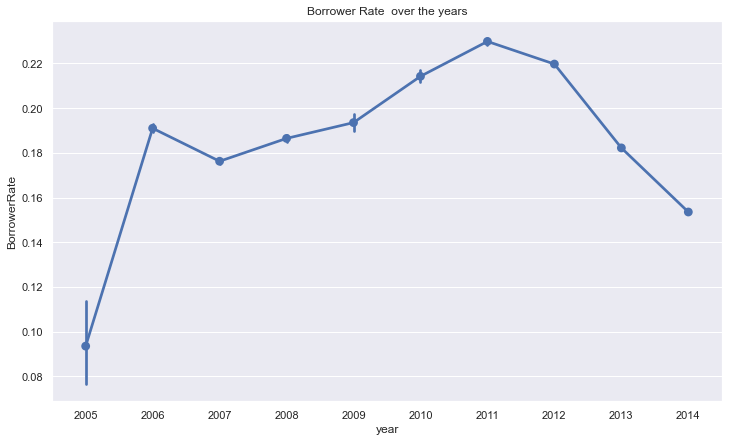

In [9]:
new_df['year'] = new_df.ListingCreationDate.str.split('-').str[0]
plt.figure(figsize = [12, 7])
years = np.sort(new_df.year.unique())
sb.pointplot(data=new_df, x='year', y='BorrowerRate', order = years)
plt.title('Borrower Rate  over the years');

> **We can see here that the BorrowRate increased alot between 2005-2006 and then dropped between 2006-2007 and then increased over the years 2007-2011 and 2011 was at his heighest and then started to drop again over the years 2011-2014**.


### <font color=blue> Relationship between IncomeRange & BorrowRate.</font>

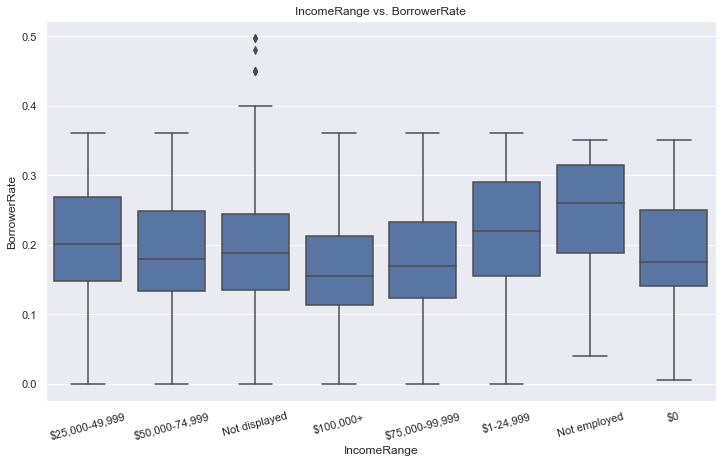

In [10]:
plt.figure(figsize = [12, 7])
color = sb.color_palette()[0]
sb.boxplot(data=new_df, x='IncomeRange', y='BorrowerRate',color=color)
plt.title('IncomeRange vs. BorrowerRate')
plt.xticks(rotation=15);

>**We can see that Borrower Rate was highest for not employed, and lowest for who earn more than 100k.**
